# Import Packages

In [253]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
%matplotlib inline
import seaborn as sns

import datetime as dt

import missingno as msno # viz missing values

sns.set_style("darkgrid")
import itertools

In [254]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import matthews_corrcoef

from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Utility Functions and Pipelines

In [255]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

refer to this [post](https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd)

In [256]:
def report(true_y, pred_y, class_names):
    print(classification_report(true_y, pred_y, target_names=class_names))
    print('-----------------------------')
    
    # Cohen Kappa Score
    cohen_kappa = round(cohen_kappa_score(true_y, pred_y),2)
    print(f'Cohen Jappa Score: {cohen_kappa}') # a score above 0.8 is considered excellent.
    
    # Matthews Correlation Coefficient
    Matthews_Coefficient = round(metrics.matthews_corrcoef(true_y, pred_y),2)
    print(f'Matthews Coefficient: {Matthews_Coefficient}') # values over 0.7 are considered good scores

# Read datasets

In [257]:
label_2 = pd.read_excel('label_2.xlsx')

In [258]:
label_3 = pd.read_excel('label_3.xlsx')

In [259]:
CustomerDemo = pd.read_excel('CustomerDemo.xlsx')

In [260]:
CustomerAddr = pd.read_excel('CustomerAddr.xlsx')

In [261]:
NewCustomer = pd.read_excel('NewCustomer.xlsx')

# Ready for modeling

In [262]:
CustomerDemo.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,age
0,1,Laraine,Medendorp,Female,93,Executive Secretary,Health,Mass Customer,Yes,11,64
1,2,Eli,Bockman,Male,81,Administrative Officer,Financial Services,Mass Customer,Yes,16,37


In [263]:
CustomerAddr.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10


In [264]:
PastCustomer = pd.merge(CustomerDemo, CustomerAddr, on = 'customer_id', how = 'inner')

In [265]:
label_2.head()

,customer_id,cluster
0,1,high
1,2,low
2,3,high
3,4,low
4,5,high


In [266]:
PastCust_demo_labeled_2 = pd.merge(PastCustomer, label_2, on = 'customer_id', how = 'inner')

In [267]:
PastCust_demo_labeled_3 = pd.merge(PastCustomer, label_3, on = 'customer_id', how = 'inner')

In [268]:
PastCust_demo_labeled_3.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'address', 'postcode', 'state', 'country', 'property_valuation',
       'cluster'],
      dtype='object')

In [269]:
PastCust_demo_labeled_2.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure', 'age',
       'address', 'postcode', 'state', 'country', 'property_valuation',
       'cluster'],
      dtype='object')

## Ready for modeling (num + cat)

In [270]:
PastCust_demo_labeled_3.drop(['first_name',
                            'last_name',
                            'job_title',
                            'job_industry_category',
                            'address',
                            'postcode',
                            'country'], axis=1, inplace=True)

In [271]:
PastCust_demo_labeled_2.drop(['first_name',
                            'last_name',
                            'job_title',
                            'job_industry_category',
                            'address',
                            'postcode',
                            'country'], axis=1, inplace=True)

In [272]:
PastCust_demo_labeled_3.head(3)

,customer_id,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,age,state,property_valuation,cluster
0,1,Female,93,Mass Customer,Yes,11,64,NSW,10,high
1,2,Male,81,Mass Customer,Yes,16,37,NSW,10,low
2,4,Male,33,Mass Customer,No,7,56,QLD,9,low


In [273]:
PastCust_demo_labeled_2.head(3)

,customer_id,gender,past_3_years_bike_related_purchases,wealth_segment,owns_car,tenure,age,state,property_valuation,cluster
0,1,Female,93,Mass Customer,Yes,11,64,NSW,10,high
1,2,Male,81,Mass Customer,Yes,16,37,NSW,10,low
2,4,Male,33,Mass Customer,No,7,56,QLD,9,low


## Numerical --> Categorical

In [274]:
PastCust_demo_cat_labeled_3 = PastCust_demo_labeled_3.copy()

In [275]:
PastCust_demo_cat_labeled_2 = PastCust_demo_labeled_2.copy()

### Age

In [276]:
def age_cat(x):
    if x <=30:
        return 'young'
    elif x > 50:
        return 'senior'
    else:
        return 'mid-age'

In [277]:
PastCust_demo_cat_labeled_3['age_cat'] = PastCust_demo_cat_labeled_3['age'].apply(lambda x: age_cat(x))

In [278]:
PastCust_demo_cat_labeled_2['age_cat'] = PastCust_demo_cat_labeled_2['age'].apply(lambda x: age_cat(x))

### past_3_years_bike_related_purchases

In [279]:
def purchase_cat(x):
    if x <=20:
        return 'few'
    elif x > 70:
        return 'many'
    else:
        return 'medium'

In [280]:
PastCust_demo_cat_labeled_3['purchase_cat'] = PastCust_demo_cat_labeled_3['past_3_years_bike_related_purchases'].apply(lambda x: purchase_cat(x))

In [281]:
PastCust_demo_cat_labeled_2['purchase_cat'] = PastCust_demo_cat_labeled_2['past_3_years_bike_related_purchases'].apply(lambda x: age_cat(x))

### Tenure

In [282]:
def tenure_cat(x):
    if x <=6:
        return 'short'
    elif x > 15:
        return 'long'
    else:
        return 'medium'

In [283]:
PastCust_demo_cat_labeled_3['tenure_cat'] = PastCust_demo_cat_labeled_3['tenure'].apply(lambda x: tenure_cat(x))

In [284]:
PastCust_demo_cat_labeled_2['tenure_cat'] = PastCust_demo_cat_labeled_2['tenure'].apply(lambda x: tenure_cat(x))

### Property

In [285]:
def property_cat(x):
    if x <=6:
        return 'low'
    elif x > 10:
        return 'high'
    else:
        return 'medium'

In [286]:
PastCust_demo_cat_labeled_3['property_cat'] = PastCust_demo_cat_labeled_3['property_valuation'].apply(lambda x: property_cat(x))

In [287]:
PastCust_demo_cat_labeled_2['property_cat'] = PastCust_demo_cat_labeled_2['property_valuation'].apply(lambda x: property_cat(x))

## Ready for modeling (cat only)

In [288]:
PastCust_demo_cat_labeled_3.drop(['past_3_years_bike_related_purchases',
                                'tenure',
                                'age',
                                'property_valuation'], axis=1, inplace=True)

In [289]:
PastCust_demo_cat_labeled_2.drop(['past_3_years_bike_related_purchases',
                                'tenure',
                                'age',
                                'property_valuation'], axis=1, inplace=True)

In [290]:
PastCust_demo_cat_labeled_3.head()

,customer_id,gender,wealth_segment,owns_car,state,cluster,age_cat,purchase_cat,tenure_cat,property_cat
0,1,Female,Mass Customer,Yes,NSW,high,senior,many,medium,medium
1,2,Male,Mass Customer,Yes,NSW,low,mid-age,many,long,medium
2,4,Male,Mass Customer,No,QLD,low,senior,medium,medium,medium
3,5,Female,Affluent Customer,Yes,NSW,medium,mid-age,medium,medium,low
4,6,Male,High Net Worth,Yes,VIC,medium,senior,medium,medium,medium


In [291]:
PastCust_demo_cat_labeled_2.head()

,customer_id,gender,wealth_segment,owns_car,state,cluster,age_cat,purchase_cat,tenure_cat,property_cat
0,1,Female,Mass Customer,Yes,NSW,high,senior,senior,medium,medium
1,2,Male,Mass Customer,Yes,NSW,low,mid-age,senior,long,medium
2,4,Male,Mass Customer,No,QLD,low,senior,mid-age,medium,medium
3,5,Female,Affluent Customer,Yes,NSW,high,mid-age,senior,medium,low
4,6,Male,High Net Worth,Yes,VIC,low,senior,mid-age,medium,medium


# Model fitting

In [227]:
X = PastCust_demo_cat_labeled_3.drop(['customer_id', 'cluster'],axis=1)
y = PastCust_demo_cat_labeled_3['cluster']

In [228]:
# one-hot encode
X = pd.get_dummies(X)

In [229]:
X.head()

,gender_Female,gender_Male,wealth_segment_Affluent Customer,wealth_segment_High Net Worth,wealth_segment_Mass Customer,owns_car_No,owns_car_Yes,state_NSW,state_QLD,state_VIC,...,age_cat_young,purchase_cat_few,purchase_cat_many,purchase_cat_medium,tenure_cat_long,tenure_cat_medium,tenure_cat_short,property_cat_high,property_cat_low,property_cat_medium
0,1,0,0,0,1,0,1,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,0,1,0,0,1,0,1,1,0,0,...,0,0,1,0,1,0,0,0,0,1
2,0,1,0,0,1,1,0,0,1,0,...,0,0,0,1,0,1,0,0,0,1
3,1,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,1,0
4,0,1,0,1,0,0,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1


In [230]:
X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    stratify=y, test_size=0.3,
                                                    random_state = 123)

In [231]:
class_names = ['high','low', 'medium']

## Decision Tree

[[0.39193084 0.14121037 0.46685879]
 [0.41040462 0.13872832 0.45086705]
 [0.39562624 0.1471173  0.45725646]]
Classification report: DT w/o SMOTE
-------------------------------
              precision    recall  f1-score   support

        high       0.33      0.39      0.36       347
         low       0.16      0.14      0.15       173
      medium       0.49      0.46      0.47       503

    accuracy                           0.38      1023
   macro avg       0.33      0.33      0.33      1023
weighted avg       0.38      0.38      0.38      1023

-----------------------------
Cohen Jappa Score: -0.01
Matthews Coefficient: -0.01


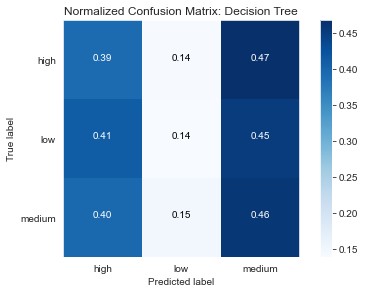

In [232]:
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
y_predict = dtclf.predict(X_test)
    
plot_confusion_matrix(confusion_matrix(y_test,y_predict),
                      class_names, 
                      normalize=True,
                      title='Normalized Confusion Matrix: Decision Tree')

print('Classification report: DT w/o SMOTE')
print('-------------------------------')
report(y_test, y_predict, class_names)

In [233]:
print(confusion_matrix(y_test,y_predict))
print(classification_report(y_test,y_predict))

[[136  49 162]
 [ 71  24  78]
 [199  74 230]]
              precision    recall  f1-score   support

        high       0.33      0.39      0.36       347
         low       0.16      0.14      0.15       173
      medium       0.49      0.46      0.47       503

    accuracy                           0.38      1023
   macro avg       0.33      0.33      0.33      1023
weighted avg       0.38      0.38      0.38      1023



# Export files

In [292]:
PastCust_demo_labeled_3.to_excel('PastCust_demo_labeled_3.xlsx', index=False)

In [293]:
PastCust_demo_labeled_2.to_excel('PastCust_demo_labeled_2.xlsx', index=False)

In [294]:
PastCust_demo_cat_labeled_3.to_excel('PastCust_demo_cat_labeled_3.xlsx', index=False)

In [295]:
PastCust_demo_cat_labeled_2.to_excel('PastCust_demo_cat_labeled_2.xlsx', index=False)